<center><h1>Titanic database Code Louisville Project</h1></center>
<center><h2>Project for Python class - January, 2019</h2></center>


<h4>     Student name: John Vornberger</h4>
<h4>           Course: Python</h4>
<h4>

<h4>Other necessary evils:</h4>
<p>
    Github Repository: jv30344/cl-titanic
    Default Directory: C:/CL-Project 
    <br>
    Default directory is set to C:/CL-Project (I've run into a few issues with case sensitivity, 
    so I'm going to say that the directory name is case sensitive!)
<br>    
<ol>
    <li> Python </li>
    <li> Pandas</li>
    <li> Anaconda</li>
    <li> Jupyter Notebook</li>
    <li> Sqlite3</li>
    <li> matplotlib (for graphs)</li>
    <li> seaborn (also for graphs)</li>
</ol>
</p>
<br>
<p>
    This project is based on data from several different sources containing passenger data from the Titanic.  I've worked       hard studying the data from several sources along with merging corrections and updates into my database.  It's still       not quite complete, but it'll do for this project.
</p>

<h3>Setting up to run the process</h3>

<ol>
    <li> Make sure the default directory is set to C:/CL-Project ( The directory name is case sensitive!)</li>
    <li> This project needs to have Python, Pandas, Anaconda, Jupyter Notebook, and Sqlite3 installed on the PC you'll be running it on</li>
    <li> You'll have done the next step if you're reading this, since this is the README.md file for this assignment.  The          name of the Git repository is jv30344/cl-titanic.
</ol>


In [1]:
#
# Pandas
import pandas as pd
#
# Matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
#
# Seaborn
import seaborn as sns
#
# sqlite
import sqlite3 as sql
#

<h3>Connect to the database</h3>

In [23]:
db = "C:/CL-Project/Titanic.db"
print("Database - " + db)
#
# Create database connection
#
conn = sql.connect(db)

Database - C:/CL-Project/Titanic.db


<h3>Pull the data from the database</h3>

In [3]:
#
# Queries
#
sql_query_all = '''
SELECT *
FROM titanic_passenger_list;
'''

In [4]:
#
# Display all of the rows in the database
# 
df = pd.read_sql_query(sql_query_all, conn)
df
#

,passenger_id,lastname,firstname,other_info,age,gender,hometown,boarded,lifeboat,body,pclass,survived,passenger,crew,crew_responsibility
0,1,Allen,Miss Elisabeth Walton,,29.00,F,,Southampton,,,1,1,1,0,
1,2,Allison,Mr Hudson Joshua Creighton,,30.00,M,,Southampton,,,1,0,1,0,
2,3,Allison,Mrs Bessie Waldo,,25.00,F,,Southampton,,,1,0,1,0,
3,4,Allison,Miss Helen Loraine,,2.00,F,,Southampton,,,1,0,1,0,
4,5,Allison,Master Hudson Trevor,,0.91,M,,Southampton,,,1,1,1,0,
5,6,Anderson,Mr Harry,,47.00,M,,Southampton,,,1,1,1,0,
6,7,Andrews,Miss Kornelia Theodosia,,62.00,F,,Cherbourg,,,1,1,1,0,
7,8,Andrews,Mr Thomas,,39.00,M,,Belfast,,,1,0,1,0,
8,9,Appleton,Mrs Charlotte,,53.00,F,,Southampton,,,1,1,1,0,
9,10,Artagaveytia,Mr Ramon,,71.00,M,,Cherbourg,,,1,0,1,0,


In [6]:
### Change some of the data types for helping with graphing the data
#
# Define appropriate data types for display
#
df["gender"] = df["gender"].astype(str)         # Gender - String (M/F)
df["survived"] = df["survived"].astype(bool)    # survived - Boolean: 0 = Did not survive, 1 = Survived
df["age"] = df["age"].astype(int)               # Age - 0-100 is valid
df["passenger"] = df["passenger"].astype(bool)  # Passenger/Crewmember 0 = Crew member,  1 = Passenger
df["pclass"] = df["pclass"].astype(int)         # Passenger Class 0=Crew member, 1=1st Class, 2=2nd Class, 3=3rd Class

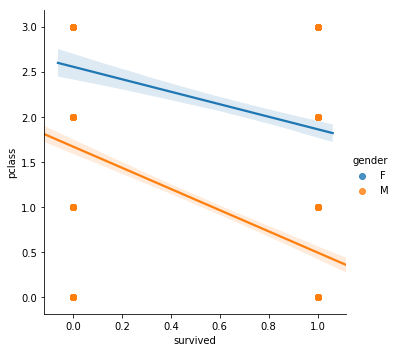

In [20]:
# Scatterplot arguments
sns.lmplot(x='survived', y='pclass', data=df,
           fit_reg='false', 
           hue='gender')

#           xlim=(0,1),
#           ylim=(0,3),
#           xticks=[0,1],
#           yticks=[0,1,2,3])

In [21]:
# matplotlib
#plt.ylim[0, None]
#plt.xlim[0, None]

TypeError: 'function' object is not subscriptable

#### The following graph shows clearly that:
######      1) The crew (pclass 0) had more male survivors than female
######      2) According to my data, only 6 first class female passengers (out of a total of 327), perished in the sinking
<h3>Explanation of graph</h3>
<h4>
    <ul>
        <li>

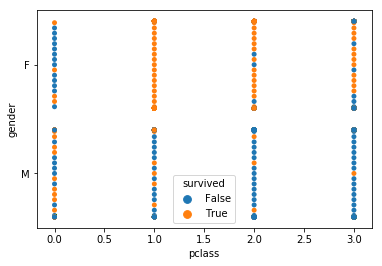

In [22]:
# Swarm plot
sns.swarmplot(x='pclass', y='gender', hue='survived', data=df)

In [ ]:


sns.countplot(x="pclass", hue="survived", data=df)

In [15]:
#
# Display the raw data showing how many died and how many survived.  These counts vary based on what website you 
# got them from.
#
print(df.survived.value_counts())

False    1163
True     1021
Name: survived, dtype: int64


In [14]:
df.gender.value_counts()

M    1709
F     475
Name: gender, dtype: int64

In [ ]:
df.pclass.value_counts()

In [ ]:
df.passenger.value_counts()


In [ ]:
df.crew.value_counts()

In [ ]:
sns.lmplot(x="age", y="survived", col="gender", hue="pclass", data=df, logistic=True)

In [ ]:
sns.lmplot(x="age", y="survived", hue="pclass", data=df, logistic=True)
# sns.barplot(x="age", y="survived", hue="pclass", data=df)

In [ ]:
sns.lmplot(x="age", y="pclass", hue="survived", data=df, logistic=True)